In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('data_16 Star.csv', index_col = 0)

In [37]:
df['submitted_date'] = pd.to_datetime(df['submitted_date'])

In [53]:
df.shape

(507, 11)

The 16-Star Speedrun in Super Mario 64 is a racing challenge where players complete the game as quickly as possible while only collecting 16 Power Stars. By using glitches and shortcuts, speedrunners bypass much of the game's content, resulting in impressive completion times often under 20 minutes.

In [52]:
df.isnull().sum()

id                       0
place                    0
speedrun_link            0
submitted_date          23
primary_time_seconds     0
real_time_seconds        0
player_id               35
player_name             35
player_country          54
platform                 0
verified                 0
dtype: int64

In [54]:
df.dropna(inplace=True)

In [109]:
df.sort_values('primary_time_seconds', ascending = True).head()

,id,place,speedrun_link,submitted_date,primary_time_seconds,real_time_seconds,player_id,player_name,player_country,platform,verified,moving_average
0,yol5kxjy,1,https://www.speedrun.com/sm64/run/yol5kxjy,2023-03-23 06:20:48+00:00,875.50,875.50,jn32931x,Suigi,Canada,N64,Yes,952.9208
1,zppddvxz,2,https://www.speedrun.com/sm64/run/zppddvxz,2023-11-25 16:02:09+00:00,881.21,881.21,1xypyovx,Slipperynip,United States,N64,Yes,957.6612
2,me0pw13z,3,https://www.speedrun.com/sm64/run/me0pw13z,2024-01-18 12:05:31+00:00,885.21,885.21,kjprmwk8,Weegee,United States,N64,Yes,950.1004
3,y60jnn0y,4,https://www.speedrun.com/sm64/run/y60jnn0y,2022-07-06 19:10:40+00:00,892.00,892.00,x353dr7j,Finnii602,Germany,VC,Yes,966.7368
4,ywj1gg9z,5,https://www.speedrun.com/sm64/run/ywj1gg9z,2021-12-09 16:44:16+00:00,895.81,895.81,kj92gmv8,Dowsky,United States,N64,Yes,967.4980


Over the past few years, the competition in the 16-Star Speedrun category has intensified. From 2021 to early 2024, record times have consistently improved, showcasing the skill and dedication of top players. For instance, Suigi's 875.50-second run in March 2023 stands as the current record, highlighting the ongoing evolution in speedrunning techniques. Our analysis reveals that the top players hail from various countries, with notable performances from the United States and Canada. Interestingly, while most top times are from the N64 platform, the comparison with the Virtual Console (VC) version shows that both platforms have competitive times. This underscores the global and platform-diverse nature of the speedrunning community."

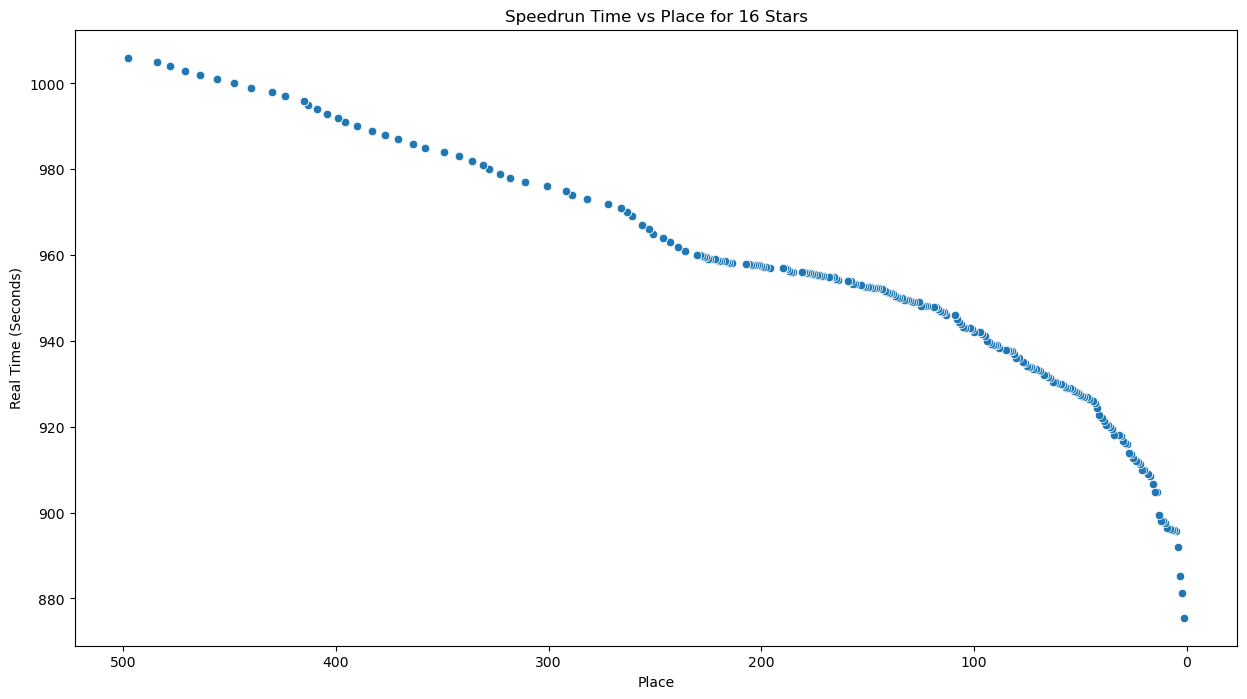

In [32]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create a scatter plot
sns.scatterplot(data=df, x="place", y="real_time_seconds")

# Set the title and labels
plt.title("Speedrun Time vs Place for 16 Stars")
plt.xlabel("Place")
plt.ylabel("Real Time (Seconds)")

# Customize the plot appearance
plt.gca().invert_xaxis()

# Display the plot
plt.show()

Speedrunning is a fascinating blend of skill, strategy, and dedication. For many speedrunners, achieving even a fraction of a second faster can be the result of countless hours of practice and refinement. Here’s how speedrunners perfect their craft and why those tiny time improvements are so crucial:

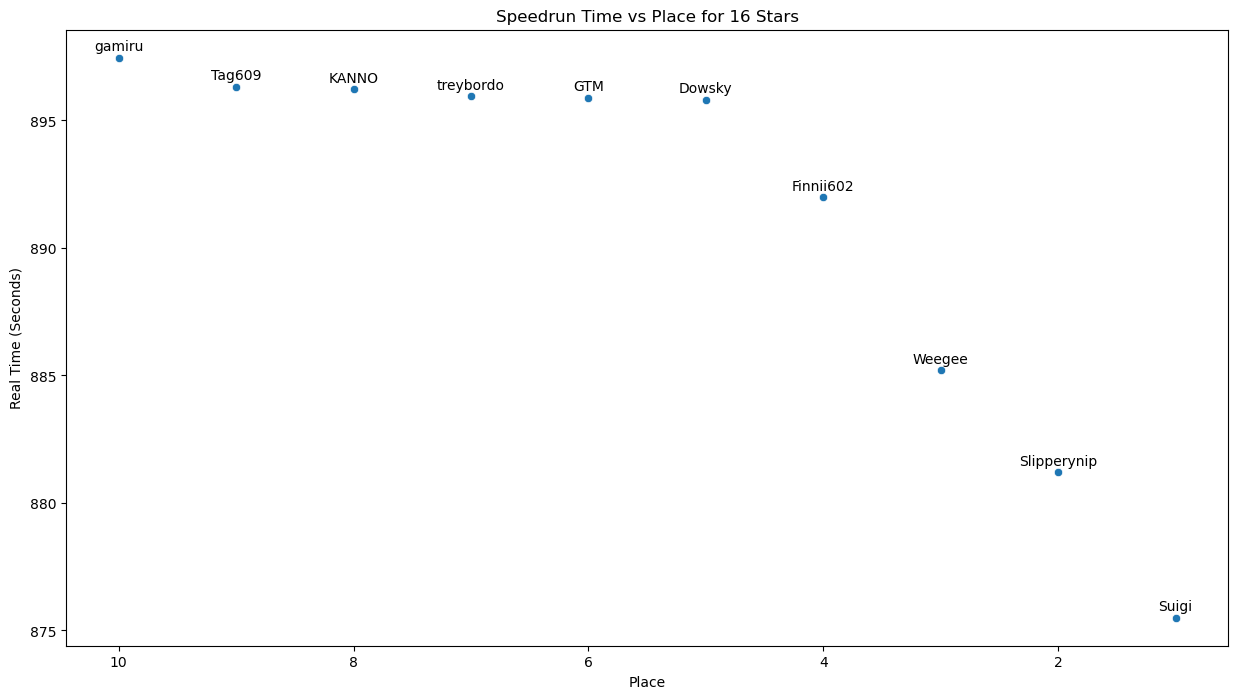

In [35]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create a scatter plot
sns.scatterplot(data=df.head(10), x="place", y="real_time_seconds")

# Set the title and labels
plt.title("Speedrun Time vs Place for 16 Stars")
plt.xlabel("Place")
plt.ylabel("Real Time (Seconds)")

# Customize the plot appearance
plt.gca().invert_xaxis()

for i in range(len(df.head(10))):
    plt.annotate(df['player_name'].iloc[i], 
                 (df['place'].iloc[i], df['real_time_seconds'].iloc[i]),
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center')

# Display the plot
plt.show()

The top 4 are in a whole different level, how are people getting better? Minor optimizations can lead to new strategies or approaches. As runners discover new ways to shave off seconds, these strategies can evolve and become standard practice in the community.

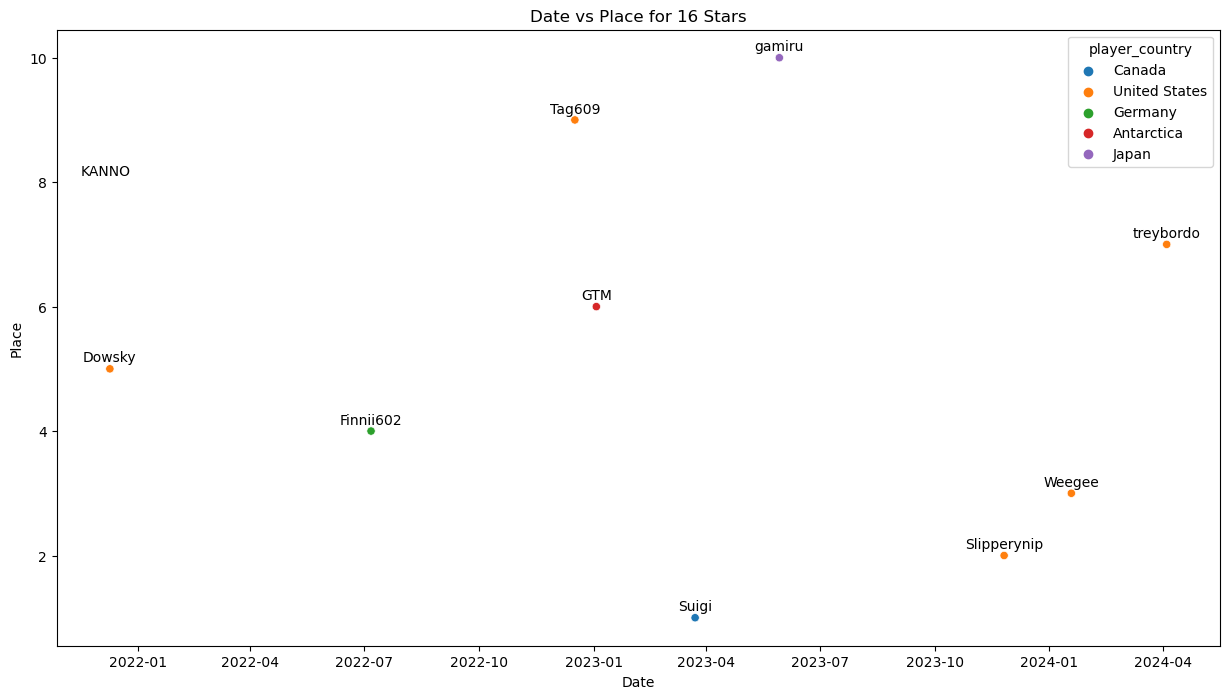

In [48]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create a scatter plot
sns.scatterplot(data=df.head(10), x="submitted_date", y="place", hue = 'player_country')

# Set the title and labels
plt.title("Date vs Place for 16 Stars")
plt.xlabel("Date")
plt.ylabel("Place")

# Customize the plot appearance
#plt.gca().invert_xaxis()

for i in range(len(df.head(10))):
    plt.annotate(df['player_name'].iloc[i], 
                 (df['submitted_date'].iloc[i], df['place'].iloc[i]),
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center')

# Display the plot
plt.show()

In [76]:
def seconds_to_mmss(seconds):
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f'{minutes:02}:{seconds:02}'

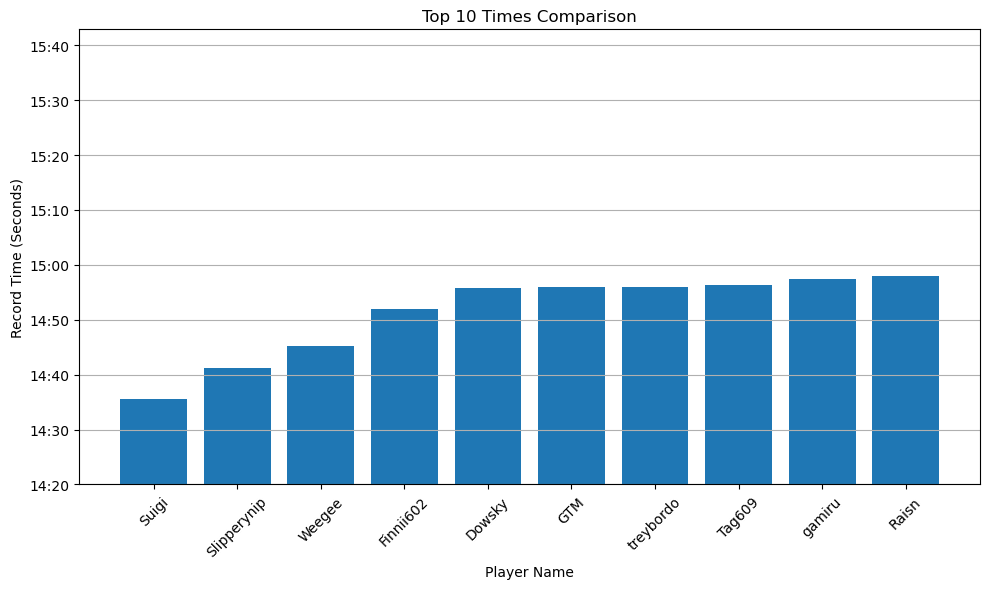

In [108]:
df_top5 = df.sort_values('primary_time_seconds', ascending = True).head(10)

# Plot Top 5 Times Comparison
plt.figure(figsize=(10, 6))
plt.bar(df_top5['player_name'], df_top5['primary_time_seconds'])
plt.title('Top 10 Times Comparison')
plt.xlabel('Player Name')
plt.ylabel('Record Time (Seconds)')
plt.grid(axis='y')
plt.xticks(rotation=45)
start_tick = 860  # 14:20 in seconds
plt.ylim(bottom=start_tick)

# Set y-axis ticks and format them
def format_func(value, tick_number):
    return seconds_to_mmss(value)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.tight_layout()
plt.show()

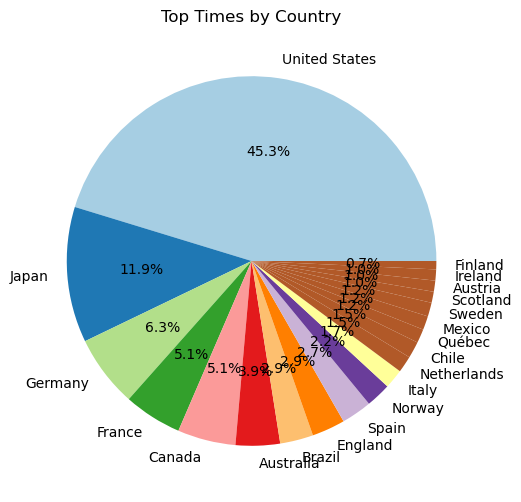

In [133]:
country_counts = df['player_country'].value_counts().head(20)

plt.figure(figsize=(10, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(country_counts))))
plt.title('Top Times by Country')
plt.show()

Mario 64 speedruns are very popular in the US and in Japan, but the record holder hails from canada.

Does the type of platform used give you a competative edge? 

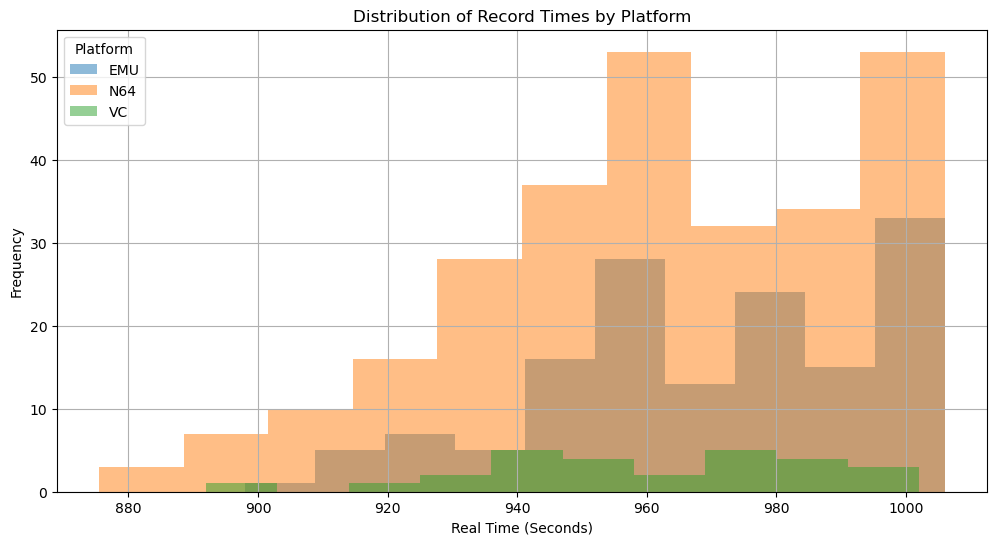

In [143]:
plt.figure(figsize=(12, 6))
for platform in df['platform'].unique():
    subset = df[df['platform'] == platform]
    plt.hist(subset['real_time_seconds'], bins=10, alpha=0.5, label=platform)

plt.title('Distribution of Record Times by Platform')
plt.xlabel('Real Time (Seconds)')
plt.ylabel('Frequency')
plt.legend(title='Platform')
plt.grid(True)
plt.show()

It seems like N64 are more used and appear on the leaderboards quite often. When every second matters, maybe running a from the source could reduce input lag.

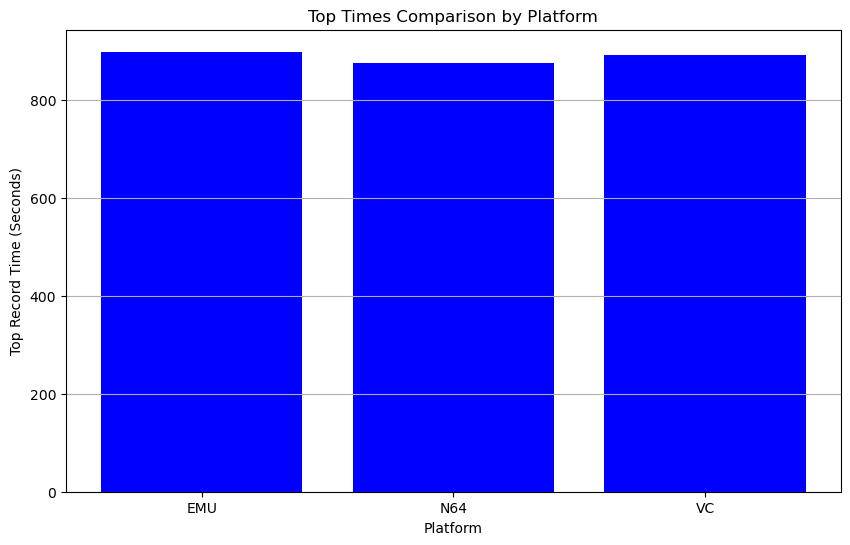

In [136]:
top_times = df.groupby('platform')['real_time_seconds'].min()

plt.figure(figsize=(10, 6))
plt.bar(top_times.index, top_times, color='b')
plt.title('Top Times Comparison by Platform')
plt.xlabel('Platform')
plt.ylabel('Top Record Time (Seconds)')
plt.grid(axis='y')
plt.show()